In [2]:
library(readr)
library(dplyr)
library(tidyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
setwd("..")

In [12]:
# adjust plot size rendered inline
options(repr.plot.width = 10, repr.plot.height = 4, repr.plot.res = 300)

In [6]:
# use Arcadia brand font if present
if(file.exists("inputs/SuisseIntl-Regular.otf")){
  library(showtext)
  font_add("SuisseIntl-Regular", "inputs/SuisseIntl-Regular.otf")
  showtext::showtext_auto()
  theme_arcadia <- theme_classic() +
    theme(text = element_text(family = "SuisseIntl-Regular"))
} else {
  theme_arcadia <- theme_classic()
}

Loading required package: sysfonts

Loading required package: showtextdb



In [8]:
overview <- read_csv("overview.csv", show_col_types = F) %>%
  mutate(class = factor(class, levels = c("read & parse", "plot", "analyze", "convert")),
         func = factor(func, levels = c("read", "upset", "heatmap", "bar", "sankey", "time series alluvial", 
                                        "sequencing depth rarefaction", "multidimensional scaling",  
                                        "detect multiple strains", "to metacoder", "to phyloseq")))


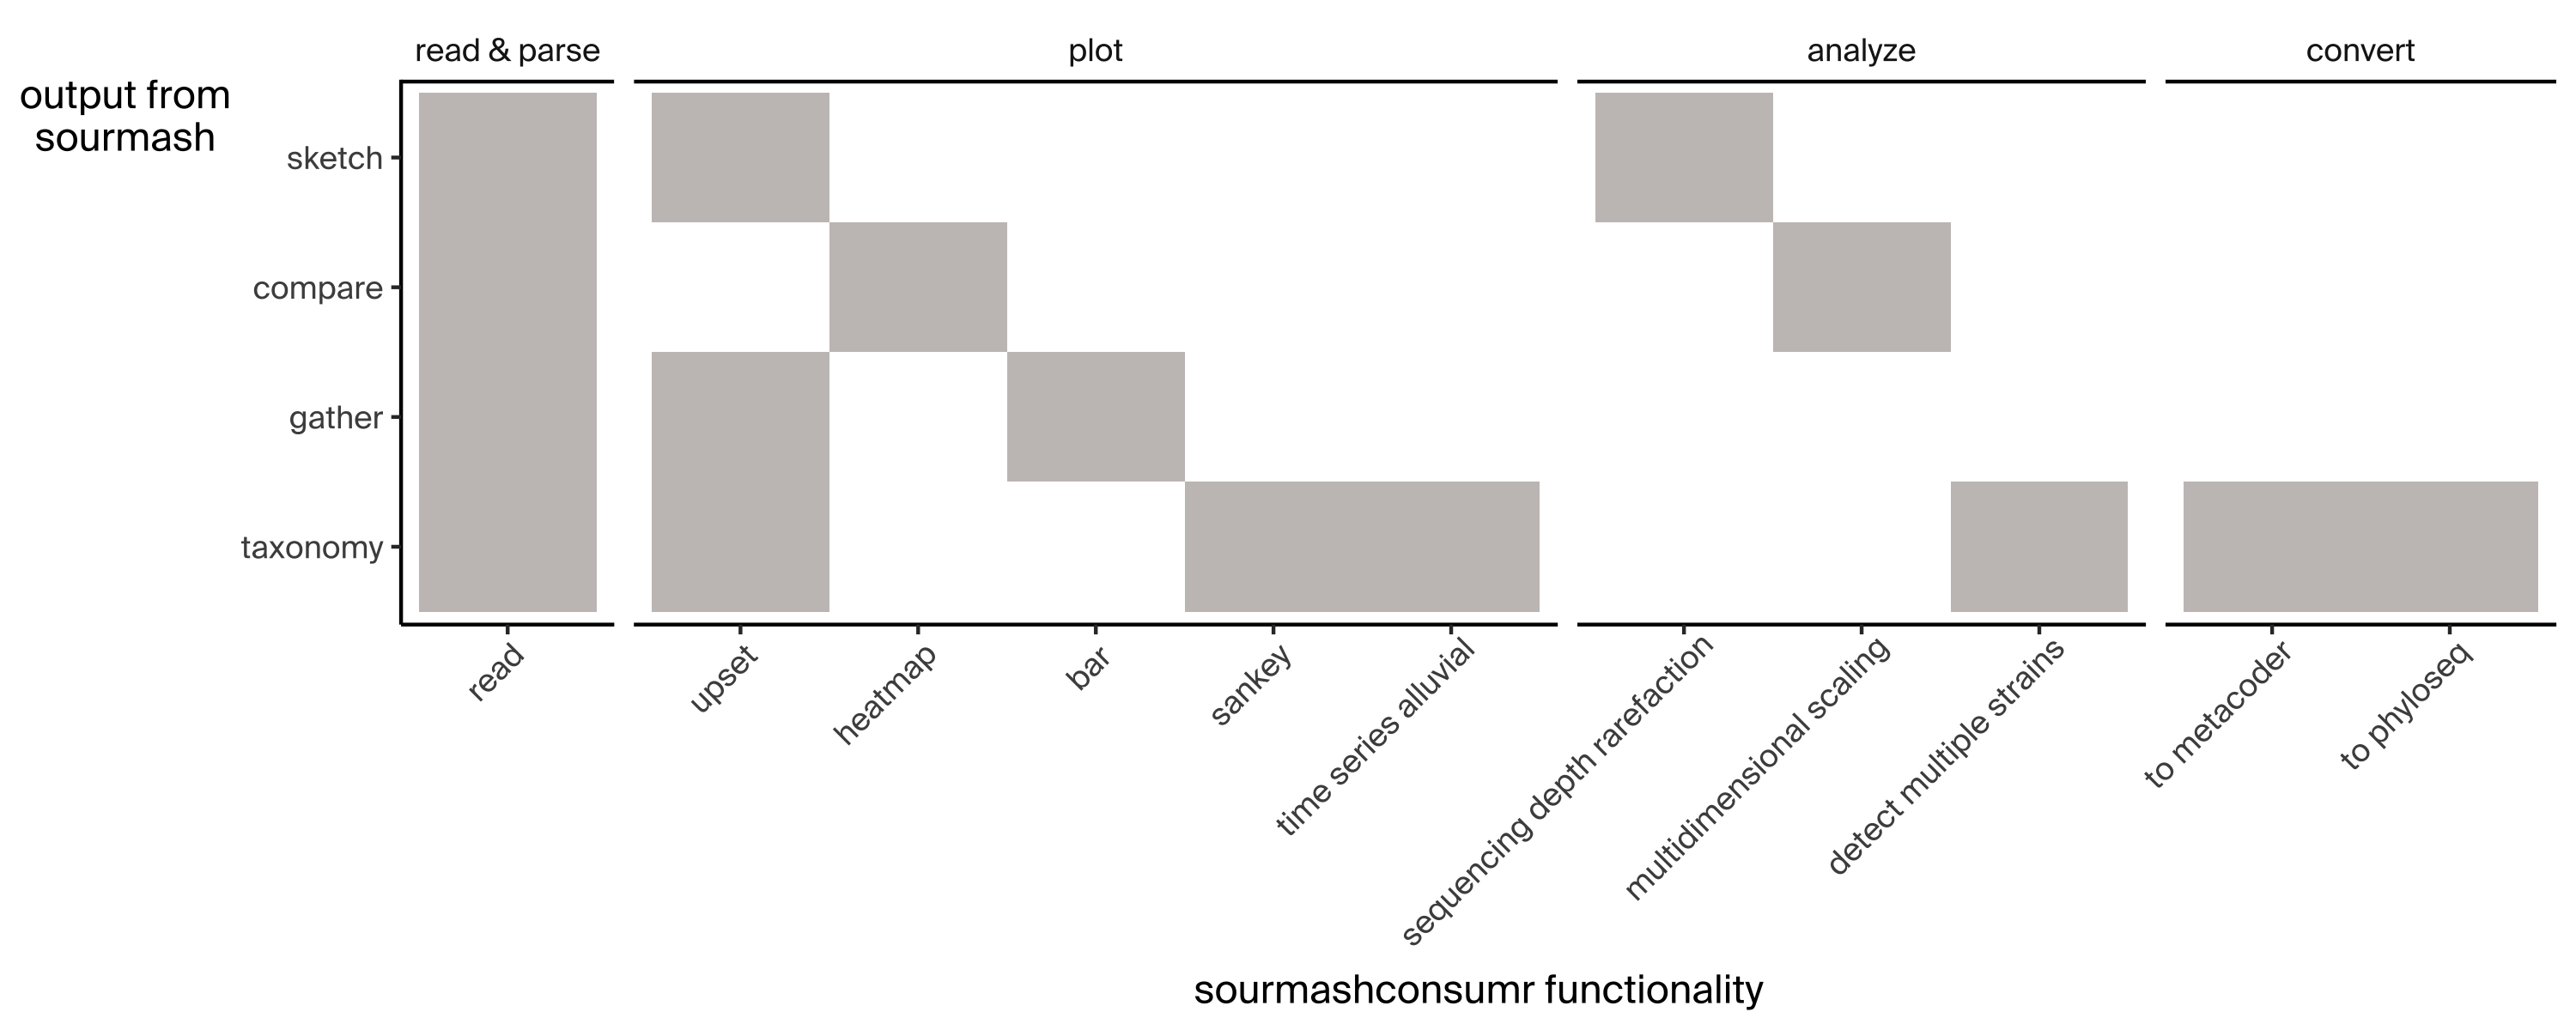

In [13]:
ggplot(overview, aes(x = func, y = sourmash, fill= value)) + 
  geom_tile() +
  scale_fill_gradient(low="white", high="#8F8885") +
  theme_arcadia +
  theme(axis.text.x = element_text(angle = 45, vjust = .99, hjust = .95), # change angle of x axis text
        axis.title.y = element_text(angle = 0, vjust = 1), # put y axis label up top
        strip.background = element_blank(), # remove strip outline
        strip.text = element_text(face = "bold"),
        strip.placement = "outside",
        legend.position = "none") + 
  annotate("segment",x=Inf,xend=-Inf,y=Inf,yend=Inf, color="black", linewidth=1) + # underline facet labels
  labs(x = "sourmashconsumr functionality",
       y = "output from\nsourmash") +
  scale_y_discrete(limits = rev(c("sketch", "compare", "gather", "taxonomy"))) +
  facet_grid(~class, scales = "free", space = "free_x")